# Librairie Pymrio et EXIOBASE3

Pymrio est une librairie sur Python qui permet de télécharger, manipuler et analyser des bases de données de tableaux entrées-sorties multi-régionaux environnementaux (EE MRIO) avec un accès libre telles que EXIOBASE, WIOD, EORA26 et OECD-ICIO.

[Lien](https://github.com/IndEcol/pymrio) du dêpot GitHup contenant le code source de Pymrio.

[Lien](https://pymrio.readthedocs.io/en/latest/) de la documentation supplémentaire sur la librairie Pymrio.

[Lien](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.251)



Pour installer le package Pymrio: <br>
pip install pymrio --upgrade

In [48]:
#importation de la librairie Pymrio
import pymrio
import pandas as pd

In [ ]:
#Chemin du dossier où seront stocker les bases de données MRIO 
exio3_folder = "/tmp/mrios/autodownload/EXIO3"

##### Processus de téléchargement et de chargement pour les données EXIOBASE3

In [ ]:
#Téléchargement des bases de donnée MRIO en format produit x produit pour les années choisies, ici 2007
exio_download = pymrio.download_exiobase3(
    storage_folder=exio3_folder, system="pxp", years=[2007])

#Chargement des données EXIOBASE3 en produit x produit pour l'année 2007
#calc_all() permet d'identifier les tables manquantes et de les calculer 
exio3_pxp = pymrio.parse_exiobase3(path="C:/Master 1/Stage/EXIOBASE3/IOT_2007_ixi.zip").calc_all()

In [7]:
#Téléchargement des bases de donnée MRIO en format industrie x industrie pour les années choisies, ici 2007
#exio_download = pymrio.download_exiobase3(
    #storage_folder=exio3_folder, system="ixi", years=[2007])

#Chargement des données EXIOBASE3 en industrie x industrie pour l'année 2007 
#calc_all() permet d'identifier les tables manquantes et de les calculer 
exio3_ixi = pymrio.parse_exiobase3(path="C:/Master 1/Stage/EXIOBASE3/IOT_2007_ixi.zip").calc_all()

c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()


## Base de données MRIO d'EXIOBASE3

Pour notre analyse, nous nous concentrons sur l'utilisation des données MRIO industry x industry car elles sont plus agrégées que celles en format produit x produit. Cela nous permet de faciliter notre analyse en manipulant des bases de données moins volumineuses.

EXIOBASE3 est composé de 49 régions. Le détail de ces régions peut être retrouvé en cliquant [ici](https://github.com/MarDrd/exiobase3-manipulation/blob/main/R%C3%A9gions.ipynb).

Chaque donnée MRIO d'EXIOBASE3 contient les bases de données en format texte suivantes :

- A.txt : la matrice des coefficients qui représente le niveau d'intrants nécessaires en millions d'euros pour produire un million d'euros de production dans chaque industrie.
- finaldemands.txt : liste des différentes catégories de demande finale.
- industries.txt : liste de toutes les industries.
- products.txt : liste de tous les produits.
- unit.txt : liste des unités utilisées pour chaque industrie, ici elles sont toutes exprimées en millions d'euros.
- x.txt : la production totale par régions et par secteurs.
- Y.txt : la matrice de la demande finale qui représente la consommation finale pour plusieurs catégories de demande finale.
- Z.txt : la matrice de transaction qui représente les échanges de biens et services entre industries.

On retrouve également deux sous-dossiers 'impacts' et 'satellite'. Le sous-dossier 'impacts' regroupe des stresseurs environnementaux agrégés tels que les émissions de gaz à effet de serre et l'utilisation des sols, alors que le sous-dossier 'satellite' désagrège ces mêmes stresseurs environnementaux, par exemple les émissions de CO2, de CH4 et de N2O suite à la combustion, et l'utilisation des sols pour différents types de cultures.

Ces sous-dossiers regroupent les matrices suivantes :

- D_cba_reg.txt : les impacts/stresseurs associés à la consommation finale dans chaque région (consumption-based account matrix).
- D_cba.txt : les impacts/stresseurs associés à la consommation finale dans chaque industrie (consumption-based account matrix).
- D_exp_reg.txt : les impacts/stresseurs associés aux exportations dans chaque région.
- D_imp_reg.txt : les impacts/stresseurs associés aux importations dans chaque région.
- D_pba_reg.txt : les impacts/stresseurs environnementaux associés à la production dans chaque région (production-based account matrix).
- D_pba.txt : les impacts/stresseurs environnementaux associés à la production dans chaque industrie (production-based account matrix).
- F_Y.txt : les impacts/stresseurs associés à la demande finale.
- F.txt : les impacts/stresseurs associés à la production.
- M.txt : la matrice de coefficients techniques qui représente les besoins d'intrants directs et indirects en millions d'euros pour produire un million d'euros de production dans chaque industrie.
- S_Y.txt : la matrice de coefficients des impacts/stresseurs environnementaux pour répondre à la demande finale.
- S.txt : la matrice de coefficients des impacts/stresseurs environnementaux pour chaque industrie.
- unit.txt : liste des unités utilisées pour chaque impact/stresseur.

Pour avoir plus de détails sur ces bases de données EXIOBASE3, vous pouvez cliquer [ici](https://zenodo.org/records/5589597).

Nous avons créé un document donnant plus de détails sur la formation de ces matrices, leur composition et leur taille que vous pouvez retrouver en cliquant ici.

Enregistrement des bases de données en format zip avec les noms :

- IOT_{YEAR}_pxp pour les tables input-output en format produit x produit pour l'année choisie.
- IOT_{YEAR}_ixi pour les tables input-output en format industrie x industrie pour l'année choisie.

Il est possible de télécharger les données MRIO d'EXIOBASE3 de 1995 à 2022.

Nous nous intéressons ici aux bases de données MRIO d'EXIOBASE3, car ce sont celles que nous avons utilisées tout au long de notre analyse. Si vous êtes intéressé par les bases de données MRIO telles que celles de WIOD, EORA26 et OECD-ICIO, vous pouvez voir leur processus de téléchargement et de chargement en suivant ce [lien](https://pymrio.readthedocs.io/en/latest/notebooks/autodownload.html#).

In [9]:
#La matrice x
x = exio3_ixi.x

#La matrice Y
Y = exio3_ixi.Y

#La matrice Z
Z = exio3_ixi.Z

#La matrice A
A = exio3_ixi.A

#Afficher la matrice A
A

region                                                                           AT  \
sector                                                    Cultivation of paddy rice   
region sector                                                                         
AT     Cultivation of paddy rice                                                  0   
       Cultivation of wheat                                                       0   
       Cultivation of cereal grains nec                                           0   
       Cultivation of vegetables, fruit, nuts                                     0   
       Cultivation of oil seeds                                                   0   
...                                                                             ...   
WM     Activities of membership organisation n.e.c. (91)                          0   
       Recreational, cultural and sporting activities ...                         0   
       Other service activities (93)                                              0   
       Private households with employed persons (95)                              0   
       Extra-territorial organizations and bodies                                 0   

region                                                                          \
sector                                                    Cultivation of wheat   
region sector                                                                    
AT     Cultivation of paddy rice                                  0.000000e+00   
       Cultivation of wheat                                       2.258764e-02   
       Cultivation of cereal grains nec                           0.000000e+00   
       Cultivation of vegetables, fruit, nuts                     0.000000e+00   
       Cultivation of oil seeds                                   0.000000e+00   
...                                                                        ...   
WM     Activities of membership organisation n.e.c. (91)          8.836211e-08   
       Recreational, cultural and sporting activities ...         8.141581e-07   
       Other service activities (93)                              5.156536e-07   
       Private households with employed persons (95)              2.774700e-07   
       Extra-territorial organizations and bodies                 0.000000e+00   

region                                                                                      \
sector                                                    Cultivation of cereal grains nec   
region sector                                                                                
AT     Cultivation of paddy rice                                              0.000000e+00   
       Cultivation of wheat                                                   0.000000e+00   
       Cultivation of cereal grains nec                                       1.061038e-02   
       Cultivation of vegetables, fruit, nuts                                 0.000000e+00   
       Cultivation of oil seeds                                               0.000000e+00   
...                                                                                    ...   
WM     Activities of membership organisation n.e.c. (91)                      8.627059e-08   
       Recreational, cultural and sporting activities ...                     7.757368e-07   
       Other service activities (93)                                          6.399811e-07   
       Private households with employed persons (95)                          2.724062e-07   
       Extra-territorial organizations and bodies                             0.000000e+00   

region                                                                                            \
sector                                                    Cultivation of vegetables, fruit, nuts   
region sector                                                                                      
AT     Cultivat

In [10]:
#Pour les matrices satelittes avec ici l'exemple de la matrice D_cba et M
D_cba_sat = exio3_ixi.satellite.D_cba
M_sat = exio3_ixi.satellite.M

#Pour les matrices impacts avec ici l'exemple de la matrice D_cba et M
D_cba_imp = exio3_ixi.impacts.D_cba
M_imp = exio3_ixi.impacts.M

In [27]:
#Pour afficher les unités de chaque industries
print(exio3_ixi.unit.head(5))

#Pour afficher les unités de chaque satelitte
print(exio3_ixi.satellite.unit.head(5))

#Pour afficher les unités de chaque impacts
exio3_ixi.impacts.unit.head(5)

                                                unit
region sector                                       
AT     Cultivation of paddy rice               M.EUR
       Cultivation of wheat                    M.EUR
       Cultivation of cereal grains nec        M.EUR
       Cultivation of vegetables, fruit, nuts  M.EUR
       Cultivation of oil seeds                M.EUR
                                                     unit
Taxes less subsidies on products purchased: Total   M.EUR
Other net taxes on production                       M.EUR
Compensation of employees; wages, salaries, & e...  M.EUR
Compensation of employees; wages, salaries, & e...  M.EUR
Compensation of employees; wages, salaries, & e...  M.EUR


,unit
impact,
Value Added,M.EUR
Employment,1000 p.
Employment hour,hr
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",cases


### La librairie Pymrio possède des fonctions qui permettent de calculer certaines matrices directement.

In [22]:
#Fonction qui calcul la matrice x grâce aux matrices Z et Y
x = pymrio.calc_x(Z=exio3_ixi.Z, Y=exio3_ixi.Y)

#Fonction qui calcul la matrice Z grâce à la matrices Z et x
Z = pymrio.calc_Z(A=exio3_ixi.A, x=x)

#Fonction qui calcul la matrice A grâce aux matrices Z et x
A = pymrio.calc_A(Z=exio3_ixi.Z, x=x)

#Calcul la matrice inverse de Leontief L grâce à la matrice A
L = pymrio.calc_L(A)

#Fonction qui calcul la matrice S asscoiés aux impacts grâce aux matrices F et x
S = pymrio.calc_S(F=exio3_ixi.impacts.F, x=x)

#Fonction qui calcul la matrice F asscoiés aux impacts grâce aux matrices S et x
F = pymrio.calc_F(S=S, x=x)

#Fonction qui calcul la matrice M asscoiés aux impacts grâce aux matrices S et L
M = pymrio.calc_M(S=S, L=L)

#Fonction qui calcul les matrices D_cba, D_pba, D_imp, D_exp asscoiés aux impacts grâce aux matrices S, L et Y
#Pour cette fonction Y doit être un vecteur soit en aggregeant les catégories de demande finale soit en gardant
#qu'une seule catégorie de demande finale
Y_aggregated = Y.groupby(level=0, axis=1).sum()
D_cba, D_pba, D_imp, D_exp = pymrio.calc_accounts(S=S, L=L, Y=Y_aggregated)

#Afficher les 5 premières lignes de la matrice D_cba
D_cba.head(5)

C:\Users\Marie\AppData\Local\Temp\ipykernel_10868\3932627636.py:24: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_aggregated = Y.groupby(level=0, axis=1).sum()


region                                                                    AT  \
sector                                             Cultivation of paddy rice   
impact                                                                         
Value Added                                                     1.165228e+00   
Employment                                                      1.087367e+00   
Employment hour                                                 2.140753e+06   
GHG emissions (GWP100) | Problem oriented appro...              1.974820e+07   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...              1.754099e-01   

region                                                                   \
sector                                             Cultivation of wheat   
impact                                                                    
Value Added                                                7.293693e+01   
Employment                                                 4.945363e+00   
Employment hour                                            1.121905e+07   
GHG emissions (GWP100) | Problem oriented appro...         1.250929e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...         1.068100e+01   

region                                                                               \
sector                                             Cultivation of cereal grains nec   
impact                                                                                
Value Added                                                            1.879488e+02   
Employment                                                             8.184454e+00   
Employment hour                                                        1.919875e+07   
GHG emissions (GWP100) | Problem oriented appro...                     2.176487e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                     1.998804e+01   

region                                                                                     \
sector                                             Cultivation of vegetables, fruit, nuts   
impact                                                                                      
Value Added                                                                  1.435315e+03   
Employment                                                                   1.358364e+02   
Employment hour                                                              3.012216e+08   
GHG emissions (GWP100) | Problem oriented appro...                           7.070526e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                           1.596359e+02   

region                                                                       \
sector                                             Cultivation of oil seeds   
impact                                                                        
Value Added                                                    8.887810e+01   
Employment                                                     8.096996e+00   
Employment hour                                                1.709400e+07   
GHG emissions (GWP100) | Problem oriented appro...             1.313339e+08   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...             1.403225e+01   

region                                                                                    \
sector                                             Cultivation of sugar cane, sugar beet   
impact                                                                                     
Value Added                                                                 3.421644e+00   
Employment                                                                  5.457298e-01   
Employment hour                                                             1.194957e+06   
GHG emissions (GWP100) | Problem oriented appro...                          4.128663e+06   
Human toxicity (USEtox) | USEtox2008 | 

In [21]:
#Fonction qui calcul le niveau d'impact nécessaire pour répondre à chaque catégorie de la demande finale
E = pymrio.calc_e(M=M, Y=Y)

#Afficher les 5 premières lignes de la matrice E
E.head(5)

region                                                                                      AT  \
category                                           Final consumption expenditure by households   
impact                                                                                           
Value Added                                                                       1.408562e+05   
Employment                                                                        3.569229e+03   
Employment hour                                                                   7.167951e+09   
GHG emissions (GWP100) | Problem oriented appro...                                6.023076e+10   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                1.821783e+04   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
impact                                                                                                                                    
Value Added                                                                              7.054040e+03                                     
Employment                                                                               1.194609e+02                                     
Employment hour                                                                          2.133647e+08                                     
GHG emissions (GWP100) | Problem oriented appro...                                       1.478852e+09                                     
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                       3.560401e+02                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
impact                                                                                           
Value Added                                                                       5.330206e+04   
Employment                                                                        1.116907e+03   
Employment hour                                                                   1.915819e+09   
GHG emissions (GWP100) | Problem oriented appro...                                9.507893e+09   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                2.696652e+03   

region                                                                            \
category                                           Gross fixed capital formation   
impact                                                                             
Value Added                                                         6.579851e+04   
Employment                                                          1.511935e+03   
Employment hour                                                     2.973583e+09   
GHG emissions (GWP100) | Problem oriented appro...                  2.762329e+10   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                  2.055147e+04   

region                                                                     \
category                                           Changes in inventories   
impact                                                                      
Value Added                                                  4.108589e+03   
Employment                                                   1.180680e+02   
Employment hour                                              2.382926e+08   
GHG emissions (GWP100) | Problem oriented appro...           2.554129e+09   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...           2.055690e+03   

region                     

Pour connaître les calculs utilisés lors de l'utilisation de ces fonctions vous pouvez cliquer [ici](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.251) et [ici](https://pymrio.readthedocs.io/en/latest/api_references.html#low-level-matrix-calculations).

### Représentations graphiques des différentes categories d'impacts et de satellites.

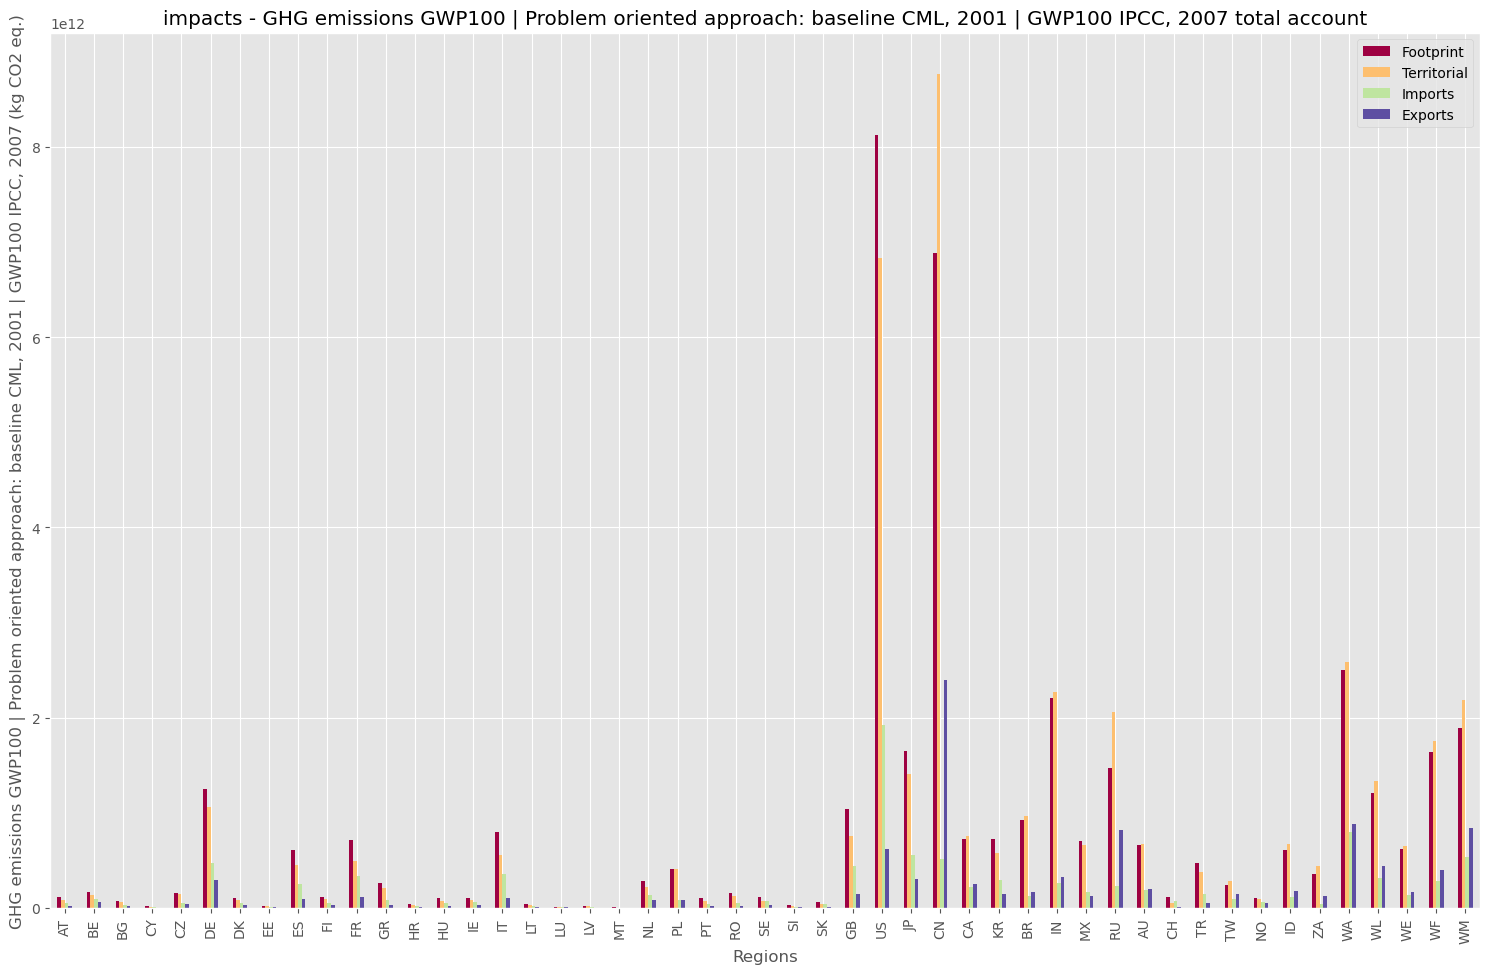

In [33]:
#importation de matplotlib
import matplotlib.pyplot as plt

#Plot pour une catégorie d'impact, ici GES
with plt.style.context('ggplot'):
    exio3_ixi.impacts.plot_account('GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)', figsize=(15,10))
    plt.show()

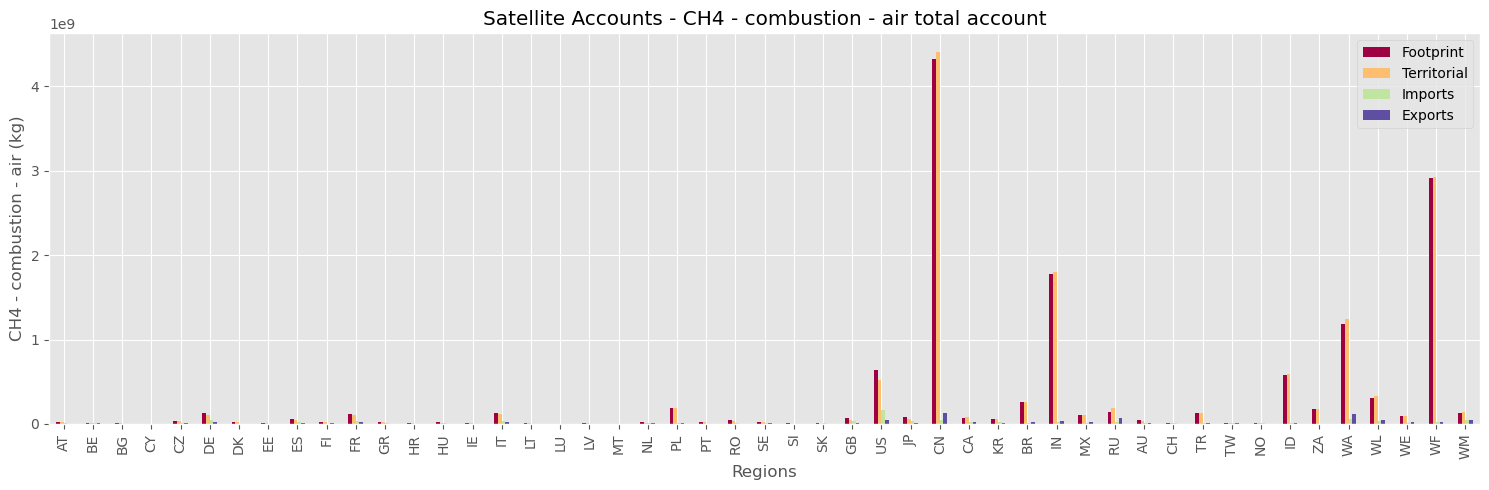

In [38]:
#Plot pour un catégorie de satellite, ici les émissions de CH4
with plt.style.context('ggplot'):
    exio3_ixi.satellite.plot_account('CH4 - combustion - air', figsize=(15,5))
    plt.show()

### Diagonalisation d'un impact/stresseur

In [54]:
#Permet de diagonaliser un impact/stresseur
diag_GES = exio3_ixi.impacts.diag_stressor('GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)')

#Résultat réintégré dans le IOSystem EXIOBASE3
exio3_ixi.GES_source = diag_GES

#Pour calculer les résultats manquants
exio3_ixi.calc_all()

#Regroupement des lignes et colonnes par régions pour la matrice D_cba
GES_source = exio3_ixi.GES_source.D_cba.groupby(
   level='region', axis=0).sum().groupby(
   level='region', axis=1).sum()

#Afficher la matrice
GES_source.head(10)

c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\Marie\anaconda3\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Use

region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SK,TR,TW,US,WA,WE,WF,WL,WM,ZA
region,,,,,,,,,,,,,,,,,,,,,
AT,4.609416e+10,2.755809e+08,2.030274e+08,1.221439e+08,2.021506e+08,2.601529e+08,3.768891e+08,6.519522e+08,1.162891e+07,5.642089e+08,...,3.011586e+08,2.356186e+08,1.290378e+08,1.696705e+09,5.046980e+08,2.399023e+08,3.577271e+08,4.008582e+08,8.052332e+08,6.638852e+07
AU,4.585588e+08,4.281801e+11,1.215088e+09,1.273060e+08,1.975113e+09,2.135436e+09,6.649707e+08,2.057290e+10,4.822184e+07,2.512418e+08,...,1.158919e+08,1.379223e+09,5.522694e+09,2.278921e+10,1.855491e+10,6.715899e+08,2.735994e+09,3.155854e+09,9.494902e+09,8.511173e+08
BE,6.485722e+08,7.071771e+08,4.687813e+10,8.918728e+07,5.764494e+08,6.109216e+08,6.097459e+08,2.561242e+09,2.816757e+07,3.316155e+08,...,1.120306e+08,6.916693e+08,1.936725e+08,5.406721e+09,1.381898e+09,3.215302e+08,2.917651e+09,9.863821e+08,2.214009e+09,1.797666e+08
BG,2.483318e+08,1.908921e+08,2.452243e+08,4.389934e+10,1.613605e+08,1.865966e+08,1.257832e+08,5.194533e+08,2.596572e+07,1.501938e+08,...,8.805211e+07,1.514993e+09,1.288085e+08,1.088890e+09,7.915693e+08,6.694690e+08,4.165082e+08,3.839773e+08,8.271273e+08,3.665442e+07
BR,5.281785e+08,1.085613e+09,1.241763e+09,1.844118e+08,7.312642e+11,2.117785e+09,8.334972e+08,1.068821e+10,3.131865e+07,2.469596e+08,...,9.979122e+07,9.331535e+08,1.895544e+09,2.603785e+10,8.042385e+09,8.287257e+08,6.690767e+09,2.894377e+10,1.903048e+10,2.578469e+08
CA,4.803030e+08,1.570827e+09,9.723163e+08,7.557275e+07,1.580472e+09,3.802806e+11,5.818241e+08,6.067691e+09,2.341578e+07,2.671431e+08,...,1.161431e+08,7.550916e+08,1.135617e+09,1.880239e+11,4.409703e+09,4.819068e+08,1.813878e+09,5.830229e+09,3.661891e+09,2.502681e+08
CH,2.255837e+08,2.670476e+08,1.977664e+08,2.550454e+07,2.053760e+08,2.338137e+08,2.337939e+10,6.476898e+08,1.168626e+07,7.385444e+07,...,2.773569e+07,1.990107e+08,9.273635e+07,1.955480e+09,5.930812e+08,1.406127e+08,4.096141e+08,3.635771e+08,9.835183e+08,8.272406e+07
CN,6.214245e+09,5.388166e+10,1.727197e+10,2.497217e+09,2.720112e+10,4.821165e+10,6.357106e+09,5.919892e+12,2.438579e+08,5.797780e+09,...,2.283425e+09,2.728259e+10,7.217988e+09,5.880448e+11,3.852079e+11,8.397792e+09,5.707675e+10,8.701138e+10,1.438849e+11,2.514119e+09
CY,3.162393e+07,7.563561e+07,3.245308e+07,1.667332e+07,7.003913e+07,5.747381e+07,3.306285e+07,1.422220e+08,9.131524e+09,1.537042e+07,...,9.119613e+06,9.070505e+07,3.027883e+07,2.182616e+08,7.690526e+07,1.614468e+07,3.772241e+07,4.093234e+07,1.043415e+08,4.284203e+06


Permet d'afficher une matrice où les lignes représentent les régions sources des impacts/satellite et les colonnes représentent les régions réceptrices de ces impacts/satellite, en réponse à la consommation finale de chaque région.